<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 1st exercise: <font color="#C70039">Work with standard deviations for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>

* **Student: Tzu-Lun Yeh**
* **Matriculation Number: 11496498**
* **Date: 22.10.2025**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for getting into standard deviations as a common technique to detect anomalies when the data is normally distributed. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * understand the output
4. go and find three different data sets on the web 
    * kaggle.com might be a good source (they also offer an API for data download)
    * make sure two of the three data sets are normally distributed
    * download one data set that is not normally distributed
5. visualize the data
6. compute the anomalies
7. visualize the anomalies
8. does the 0,3% rule apply?
9. what are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection? 
10. which statement can be made and which cannot? 
-----------------------------------------------------------------------------------

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
np.random.seed(1)

In [78]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    print("lower limit=", round(lower_limit,8))
    print("upper limit=", round(upper_limit,8))
    
    # Generate outliers list
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    
    return anomalies

---
## Example: Generate Sample Data

In [79]:
# multiply and add by random numbers to get some real values
# randn generates samples from the normal distribution (important - see below)
data = np.random.randn(50000)  * 20 + 20

---
## Task 5: Visualize the Data

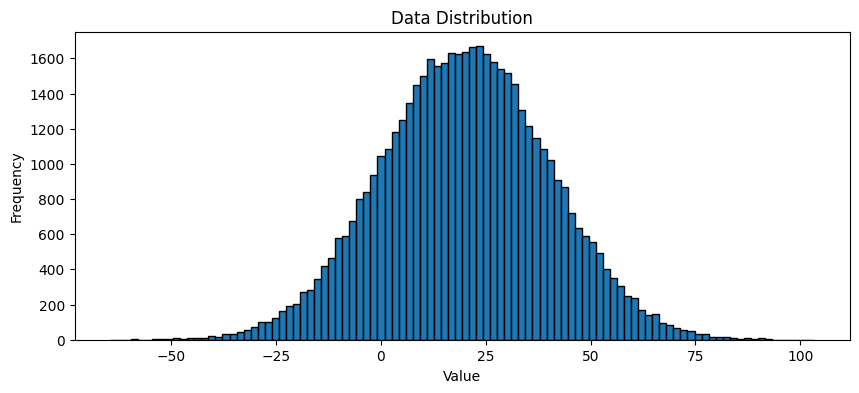

In [80]:
# Task 5: Visualize the data
plt.figure(figsize=(10, 4))
plt.hist(data, bins=100, edgecolor='black')
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

---
## Task 6: Compute the anomalies

In [81]:
# Compute anomalies using the find_anomalies function
anomalies = find_anomalies(data)

print(f"\nTotal anomalies found: {len(anomalies)}")
print(f"Anomalies: {anomalies}")

lower limit= -39.96482266
upper limit= 80.11636225

Total anomalies found: 142
Anomalies: [np.float64(80.61714224744061), np.float64(99.17205408075927), np.float64(86.4215751234073), np.float64(-41.0752876085261), np.float64(-43.06714900382097), np.float64(-40.32063970418597), np.float64(88.65326863591119), np.float64(-41.28282712210201), np.float64(94.80497807409178), np.float64(82.70094680175814), np.float64(84.76686393504752), np.float64(-45.06068469953237), np.float64(82.64059456281011), np.float64(80.25509136474466), np.float64(-43.81232693648161), np.float64(-45.21230191553079), np.float64(88.08604551497943), np.float64(82.369591815651), np.float64(85.9708104656157), np.float64(82.97968050439259), np.float64(-45.8971681339703), np.float64(-41.11266480828613), np.float64(100.53698089094755), np.float64(-44.38264211247683), np.float64(82.23783662033449), np.float64(92.26554014166295), np.float64(87.96231313004853), np.float64(91.21746641411097), np.float64(-53.128801985095905), np.

## Task 7: Visualize the anomalies

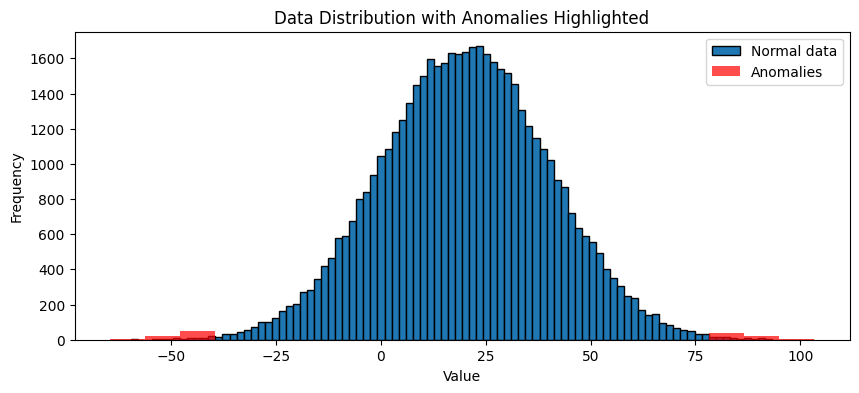

In [82]:
# Visualize anomalies on histogram
plt.figure(figsize=(10, 4))
plt.hist(data, bins=100, edgecolor='black', label='Normal data')
plt.hist(anomalies, bins=20, color='red', alpha=0.7, label='Anomalies')
plt.title('Data Distribution with Anomalies Highlighted')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Task 8: Does the 0.3% rule apply?

In [83]:
# Calculate the percentage of anomalies
total_data_points = len(data)
total_anomalies = len(anomalies)
anomaly_percentage = (total_anomalies / total_data_points) * 100

print(f"Total data points: {total_data_points}")
print(f"Total anomalies found: {total_anomalies}")
print(f"Anomaly percentage: {anomaly_percentage:.4f}%")

Total data points: 50000
Total anomalies found: 142
Anomaly percentage: 0.2840%


---
---
## Task 4: Load Dataset 1 from Kaggle

**Dataset 1: Heights and Weights Dataset**
- **Source**: https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset
- **Description**: Contains 25,000 records of human heights (inches) and weights (pounds) of 18-year-old individuals
- **Column analyzed**: Height(Inches)
- **Expected distribution**: Normal distribution (heights typically follow a normal distribution)

In [84]:
# Load the Heights and Weights dataset from Kaggle
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("burnoutminer/heights-and-weights-dataset")
print(f"Dataset downloaded to: {path}")

# Load the CSV file
import os
csv_path = os.path.join(path, "SOCR-HeightWeight.csv")
df_ds1 = pd.read_csv(csv_path)

# Display first 5 records
print("\nFirst 5 records:")
print(df_ds1.head())

# Display basic information
print("\nDataset Info:")
print(f"Total records: {len(df_ds1)}")
print(f"Columns: {list(df_ds1.columns)}")

# Extract Height column for analysis
data_ds1 = df_ds1['Height(Inches)'].values
print(f"\nHeight data shape: {data_ds1.shape}")
print(f"Height range: {data_ds1.min():.2f} - {data_ds1.max():.2f} inches")

Dataset downloaded to: /Users/tly/.cache/kagglehub/datasets/burnoutminer/heights-and-weights-dataset/versions/1

First 5 records:
   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971

Dataset Info:
Total records: 25000
Columns: ['Index', 'Height(Inches)', 'Weight(Pounds)']

Height data shape: (25000,)
Height range: 60.28 - 75.15 inches


## Task 5: Visualize Dataset 1 (Height Data)

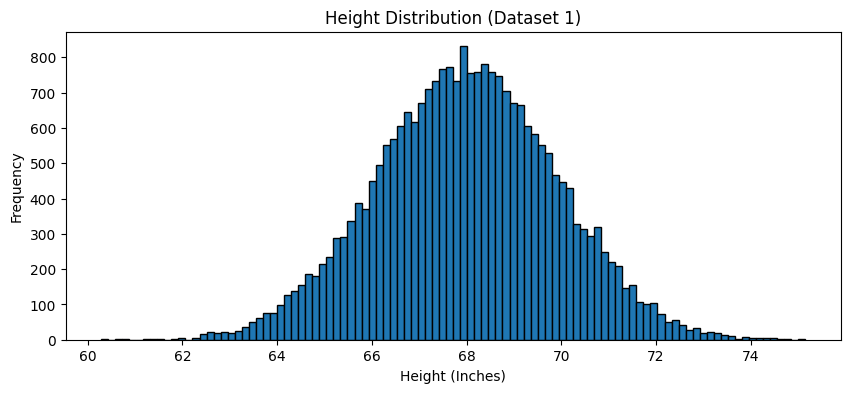

In [85]:
# Visualize the height data distribution
plt.figure(figsize=(10, 4))
plt.hist(data_ds1, bins=100, edgecolor='black')
plt.title('Height Distribution (Dataset 1)')
plt.xlabel('Height (Inches)')
plt.ylabel('Frequency')
plt.show()

## Task 6: Compute Anomalies for Dataset 1

In [86]:
# Compute anomalies for Dataset 1
anomalies_ds1 = find_anomalies(data_ds1)

print(f"\nTotal anomalies found: {len(anomalies_ds1)}")
print(f"Anomalies: {anomalies_ds1}")

lower limit= 62.28819139
upper limit= 73.69803581

Total anomalies found: 51
Anomalies: [np.float64(73.90107), np.float64(73.83364), np.float64(62.01666), np.float64(74.24899), np.float64(74.19488), np.float64(75.1528), np.float64(73.99549), np.float64(75.11519), np.float64(60.61265), np.float64(61.8934), np.float64(74.03777), np.float64(74.28376), np.float64(60.8634), np.float64(62.23548), np.float64(61.59011), np.float64(73.72628), np.float64(61.4055), np.float64(73.81695), np.float64(73.85521), np.float64(73.95409), np.float64(74.2727), np.float64(73.75335), np.float64(74.05895), np.float64(61.30021), np.float64(61.93152), np.float64(74.36328), np.float64(73.88574), np.float64(74.16797), np.float64(60.86977), np.float64(74.74047), np.float64(60.27836), np.float64(74.04804), np.float64(61.90725), np.float64(74.59993), np.float64(74.25069), np.float64(74.47517), np.float64(73.88318), np.float64(74.8489), np.float64(74.2957), np.float64(74.01942), np.float64(61.827), np.float64(62.0522

## Task 7: Visualize Anomalies for Dataset 1

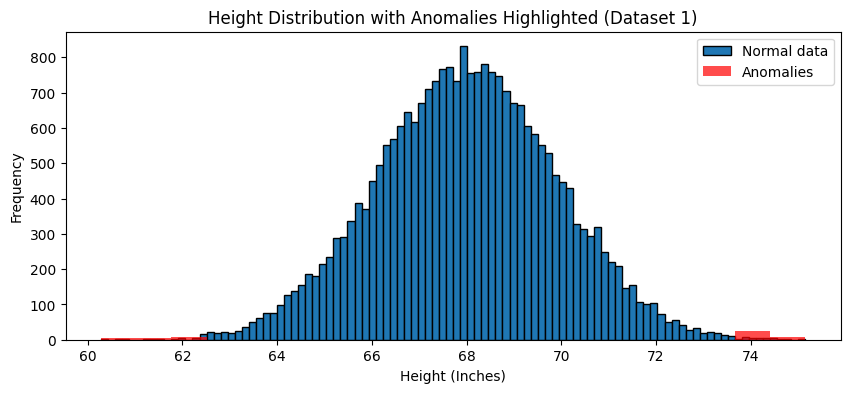

In [87]:
# Visualize anomalies in Dataset 1
plt.figure(figsize=(10, 4))
plt.hist(data_ds1, bins=100, edgecolor='black', label='Normal data')
plt.hist(anomalies_ds1, bins=20, color='red', alpha=0.7, label='Anomalies')
plt.title('Height Distribution with Anomalies Highlighted (Dataset 1)')
plt.xlabel('Height (Inches)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Task 8: Verify the 0.3% Rule for Dataset 1

In [88]:
# Calculate the percentage of anomalies for Dataset 1
total_data_points_ds1 = len(data_ds1)
total_anomalies_ds1 = len(anomalies_ds1)
anomaly_percentage_ds1 = (total_anomalies_ds1 / total_data_points_ds1) * 100

print(f"Total data points: {total_data_points_ds1}")
print(f"Total anomalies found: {total_anomalies_ds1}")
print(f"Anomaly percentage: {anomaly_percentage_ds1:.4f}%")

Total data points: 25000
Total anomalies found: 51
Anomaly percentage: 0.2040%


---
---
## Task 4: Load Dataset 2 from Kaggle

**Dataset 2: Apple iPhone Sales Data (2007-2025) - Customer Satisfaction Percentage**
- **Source**: https://www.kaggle.com/datasets/vengateshvengat/apple-iphone-complete-data-2007-2025
- **Description**: 81,260 iPhone sales records from India (2007-2025) with customer feedback
- **Column analyzed**: customer_satisfaction_percent (Customer satisfaction percentage)
- **Expected distribution**: Normal distribution (customer satisfaction typically follows normal distribution)

In [89]:
# Load the Apple iPhone Sales dataset from Kaggle
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("vengateshvengat/apple-iphone-complete-data-2007-2025")
print(f"Dataset downloaded to: {path}")

# Load the CSV file
import os
csv_path = os.path.join(path, "iphone_india_full.csv")
df_ds2 = pd.read_csv(csv_path)

# Display first 5 records
print("\nFirst 5 records:")
print(df_ds2.head())

# Display basic information
print("\nDataset Info:")
print(f"Total records: {len(df_ds2)}")
print(f"Columns: {list(df_ds2.columns)}")

# Extract customer_satisfaction_percent column for analysis
data_ds2 = df_ds2['customer_satisfaction_percent'].values
print(f"\nCustomer satisfaction data shape: {data_ds2.shape}")
print(f"Satisfaction range: {data_ds2.min():.2f}% - {data_ds2.max():.2f}%")

Dataset downloaded to: /Users/tly/.cache/kagglehub/datasets/vengateshvengat/apple-iphone-complete-data-2007-2025/versions/1

First 5 records:
   sale_id  model_id         model_name                  variant_name  \
0    73749        33  iPhone 13 Pro Max  iPhone 13 Pro Max 256GB Blue   
1    47832        28      iPhone 12 Pro    iPhone 12 Pro 128GB Purple   
2    24348         6           iPhone 5           iPhone 5 32GB Black   
3     2461         4           iPhone 4           iPhone 4 16GB Black   
4    64976         5          iPhone 4s          iPhone 4s 16GB White   

  sale_date  year  month      region       city            channel  ...  \
0   2025-02  2025      2  Tamil Nadu    Madurai  Authorized Dealer  ...   
1   2022-05  2022      5      Punjab   Ludhiana             Retail  ...   
2   2018-11  2018     11     Gujarat  Ahmedabad             Retail  ...   
3   2010-09  2010      9   Telangana   Warangal             Online  ...   
4   2024-04  2024      4      Punjab   Ludhi

## Task 5: Visualize Dataset 2 (Customer Satisfaction Data)

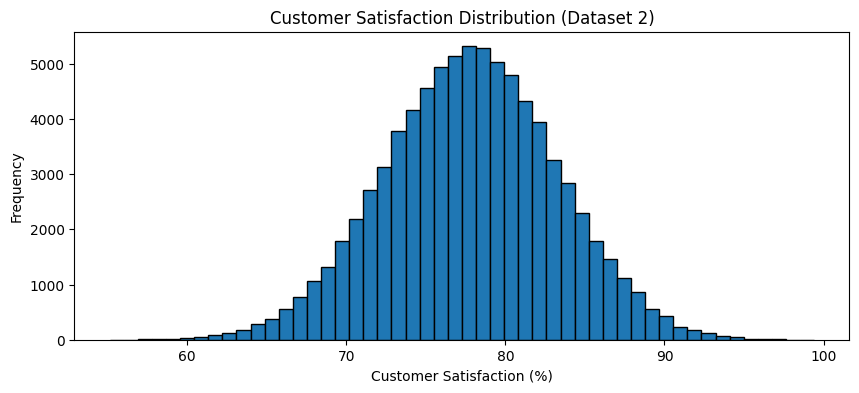

In [90]:
# Visualize the customer satisfaction data distribution
plt.figure(figsize=(10, 4))
plt.hist(data_ds2, bins=50, edgecolor='black')
plt.title('Customer Satisfaction Distribution (Dataset 2)')
plt.xlabel('Customer Satisfaction (%)')
plt.ylabel('Frequency')
plt.show()

## Task 6: Compute Anomalies for Dataset 2

In [91]:
# Compute anomalies for Dataset 2
anomalies_ds2 = find_anomalies(data_ds2)

print(f"\nTotal anomalies found: {len(anomalies_ds2)}")
print(f"Anomalies: {anomalies_ds2}")

lower limit= 61.44636859
upper limit= 94.13873774

Total anomalies found: 227
Anomalies: [np.float64(58.56), np.float64(59.69), np.float64(61.15), np.float64(60.66), np.float64(97.14), np.float64(95.22), np.float64(94.4), np.float64(59.84), np.float64(94.56), np.float64(94.31), np.float64(61.21), np.float64(94.98), np.float64(59.68), np.float64(59.8), np.float64(60.98), np.float64(60.3), np.float64(60.5), np.float64(59.11), np.float64(57.47), np.float64(95.0), np.float64(59.23), np.float64(94.41), np.float64(94.31), np.float64(60.68), np.float64(61.09), np.float64(61.0), np.float64(60.77), np.float64(94.95), np.float64(95.41), np.float64(60.86), np.float64(60.29), np.float64(94.42), np.float64(94.95), np.float64(94.43), np.float64(96.61), np.float64(94.88), np.float64(96.35), np.float64(94.88), np.float64(61.32), np.float64(94.84), np.float64(94.19), np.float64(94.49), np.float64(97.0), np.float64(60.3), np.float64(97.1), np.float64(94.85), np.float64(60.38), np.float64(59.55), np.floa

## Task 7: Visualize Anomalies for Dataset 2

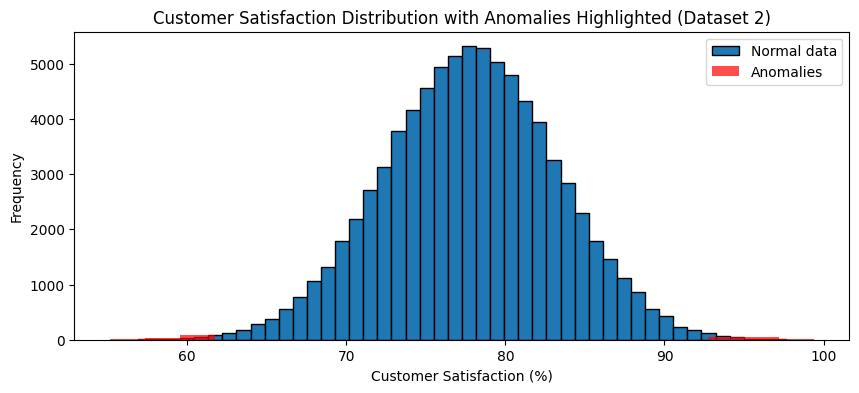

In [92]:
# Visualize anomalies in Dataset 2
plt.figure(figsize=(10, 4))
plt.hist(data_ds2, bins=50, edgecolor='black', label='Normal data')
plt.hist(anomalies_ds2, bins=20, color='red', alpha=0.7, label='Anomalies')
plt.title('Customer Satisfaction Distribution with Anomalies Highlighted (Dataset 2)')
plt.xlabel('Customer Satisfaction (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Task 8: Verify the 0.3% Rule for Dataset 2

In [93]:
# Calculate the percentage of anomalies for Dataset 2
total_data_points_ds2 = len(data_ds2)
total_anomalies_ds2 = len(anomalies_ds2)
anomaly_percentage_ds2 = (total_anomalies_ds2 / total_data_points_ds2) * 100

print(f"Total data points: {total_data_points_ds2}")
print(f"Total anomalies found: {total_anomalies_ds2}")
print(f"Anomaly percentage: {anomaly_percentage_ds2:.4f}%")

Total data points: 81260
Total anomalies found: 227
Anomaly percentage: 0.2794%


---
---
## Task 4: Load Dataset 3 from Kaggle

**Dataset 3: Spotify User Churn Analysis - Ads Listened Per Week (Non-Normal Distribution)**
- **Source**: https://www.kaggle.com/datasets/nabihazahid/spotify-dataset-for-churn-analysis
- **Description**: 8,000 Spotify user records with listening behavior and subscription data
- **Column analyzed**: ads_listened_per_week (Number of ads heard per week)
- **Expected distribution**: Non-normal distribution (Right-skewed - bimodal distribution with users hearing 0 ads vs users hearing many ads)

In [94]:
# Load the Spotify Churn dataset from Kaggle
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("nabihazahid/spotify-dataset-for-churn-analysis")
print(f"Dataset downloaded to: {path}")

# Load the CSV file
import os
csv_path = os.path.join(path, "spotify_churn_dataset.csv")
df_ds3 = pd.read_csv(csv_path)

# Display first 5 records
print("\nFirst 5 records:")
print(df_ds3.head())

# Display basic information
print("\nDataset Info:")
print(f"Total records: {len(df_ds3)}")
print(f"Columns: {list(df_ds3.columns)}")

# Extract ads_listened_per_week column for analysis
data_ds3 = df_ds3['ads_listened_per_week'].values
print(f"\nAds per week data shape: {data_ds3.shape}")
print(f"Range: {data_ds3.min()} - {data_ds3.max()} ads/week")

Dataset downloaded to: /Users/tly/.cache/kagglehub/datasets/nabihazahid/spotify-dataset-for-churn-analysis/versions/2

First 5 records:
   user_id  gender  age country subscription_type  listening_time  \
0        1  Female   54      CA              Free              26   
1        2   Other   33      DE            Family             141   
2        3    Male   38      AU           Premium             199   
3        4  Female   22      CA           Student              36   
4        5   Other   29      US            Family             250   

   songs_played_per_day  skip_rate device_type  ads_listened_per_week  \
0                    23       0.20     Desktop                     31   
1                    62       0.34         Web                      0   
2                    38       0.04      Mobile                      0   
3                     2       0.31      Mobile                      0   
4                    57       0.36      Mobile                      0   

   offline

## Task 5: Visualize Dataset 3 (Ads Per Week Data)

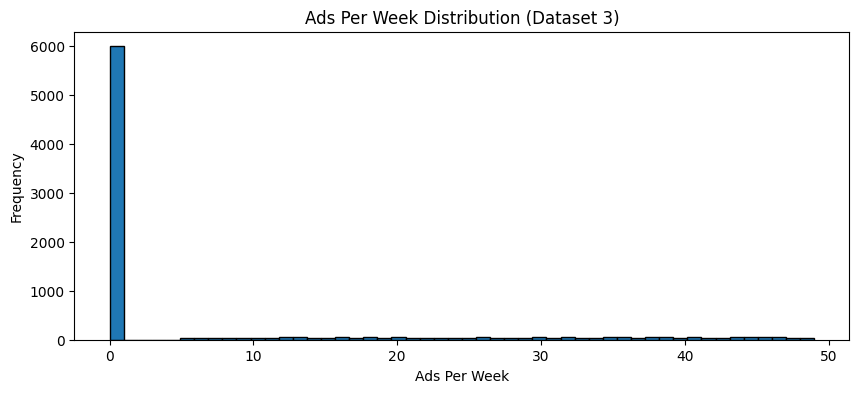

In [95]:
# Visualize the ads per week data distribution
plt.figure(figsize=(10, 4))
plt.hist(data_ds3, bins=50, edgecolor='black')
plt.title('Ads Per Week Distribution (Dataset 3)')
plt.xlabel('Ads Per Week')
plt.ylabel('Frequency')
plt.show()

## Task 6: Compute Anomalies for Dataset 3

In [96]:
# Compute anomalies for Dataset 3
anomalies_ds3 = find_anomalies(data_ds3)

print(f"\nTotal anomalies found: {len(anomalies_ds3)}")
print(f"Anomalies: {anomalies_ds3}")

lower limit= -33.90743189
upper limit= 47.79518189

Total anomalies found: 74
Anomalies: [np.int64(49), np.int64(49), np.int64(48), np.int64(48), np.int64(49), np.int64(48), np.int64(49), np.int64(49), np.int64(49), np.int64(49), np.int64(48), np.int64(48), np.int64(48), np.int64(49), np.int64(49), np.int64(48), np.int64(49), np.int64(49), np.int64(49), np.int64(48), np.int64(48), np.int64(49), np.int64(49), np.int64(48), np.int64(49), np.int64(49), np.int64(48), np.int64(48), np.int64(48), np.int64(48), np.int64(49), np.int64(49), np.int64(49), np.int64(48), np.int64(48), np.int64(48), np.int64(48), np.int64(49), np.int64(48), np.int64(48), np.int64(48), np.int64(48), np.int64(48), np.int64(48), np.int64(49), np.int64(48), np.int64(49), np.int64(49), np.int64(49), np.int64(49), np.int64(48), np.int64(48), np.int64(49), np.int64(48), np.int64(49), np.int64(48), np.int64(49), np.int64(48), np.int64(49), np.int64(49), np.int64(48), np.int64(49), np.int64(49), np.int64(48), np.int64(49), 

## Task 7: Visualize Anomalies for Dataset 3

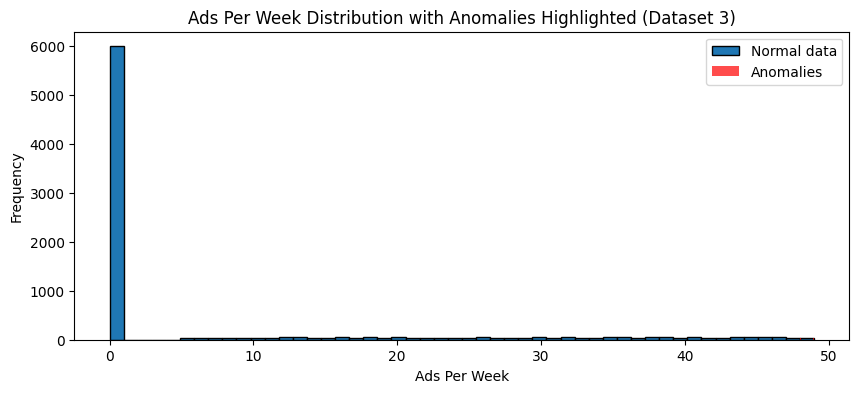

In [97]:
# Visualize anomalies in Dataset 3
plt.figure(figsize=(10, 4))
plt.hist(data_ds3, bins=50, edgecolor='black', label='Normal data')
plt.hist(anomalies_ds3, bins=20, color='red', alpha=0.7, label='Anomalies')
plt.title('Ads Per Week Distribution with Anomalies Highlighted (Dataset 3)')
plt.xlabel('Ads Per Week')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Task 8: Verify the 0.3% Rule for Dataset 3

In [98]:
# Calculate the percentage of anomalies for Dataset 3
total_data_points_ds3 = len(data_ds3)
total_anomalies_ds3 = len(anomalies_ds3)
anomaly_percentage_ds3 = (total_anomalies_ds3 / total_data_points_ds3) * 100

print(f"Total data points: {total_data_points_ds3}")
print(f"Total anomalies found: {total_anomalies_ds3}")
print(f"Anomaly percentage: {anomaly_percentage_ds3:.4f}%")

Total data points: 8000
Total anomalies found: 74
Anomaly percentage: 0.9250%


## Task 9: Differences between Normally Distributed and Non-Normally Distributed Datasets

Normal Distribution (Dataset 1 & 2):
- Anomaly percentage: 0.204%, 0.279% (close to 0.3%)
- Symmetric bell curve shape
- 3-sigma method works reliably

Non-Normal Distribution (Dataset 3):
- Anomaly percentage: 0.925% (3x higher than expected)
- Right-skewed distribution
- 3-sigma method produces false positives

Key difference: Distribution shape determines method reliability. The 3-sigma method only works accurately on normal distributions.

## Task 10: Which Statements Can Be Made and Which Cannot?

Statements that can be made:
- The 3-sigma method detects approximately 0.3% anomalies for normal distributions
- For non-normal distributions, the method fails this rule (Dataset 3: 0.925%)
- Distribution shape determines detection reliability

Statements that cannot be made:
- The 3-sigma method always finds exactly 0.3% anomalies
- All data follows the 0.3% rule
- Detection methods work regardless of distribution type

Conclusion: The 3-sigma method is reliable only for normally distributed data. Always verify distribution shape before applying this method.